# Q3) KERNEL PRINCIPAL COMPONENT ANALYSIS 

EE769-assignment(3)   
Name-Rajrishi Sarkar   
Roll-203110061   


# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\Desktop\data for data analysis\assignmnent 3 ee769\DataKPCA.csv")
df=pd.DataFrame(data)
df.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


In [3]:
df.shape

(190, 7)

In [4]:
df.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

no missing values detected

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,190.0,3.121555,0.589013,1.964315,2.679532,3.039420,3.489341,4.820967
x2,190.0,14.985682,1.298751,11.577329,14.087484,14.943396,15.764749,18.747792
x3,190.0,-47.909555,2.459375,-52.837231,-49.736194,-48.185549,-46.405402,-40.772554
x4,190.0,-8.811677,2.337179,-14.068488,-10.392405,-9.045948,-7.235609,-1.907331
x5,190.0,-2.175834,0.505819,-3.613443,-2.512570,-2.156469,-1.828925,-0.972995
x6,190.0,1.893953,0.159647,1.750006,1.773690,1.852369,1.954614,2.580983
x7,190.0,1.958302,0.108756,1.761394,1.880257,1.942348,2.018826,2.332842


## Exploratory data analysis

<AxesSubplot:>

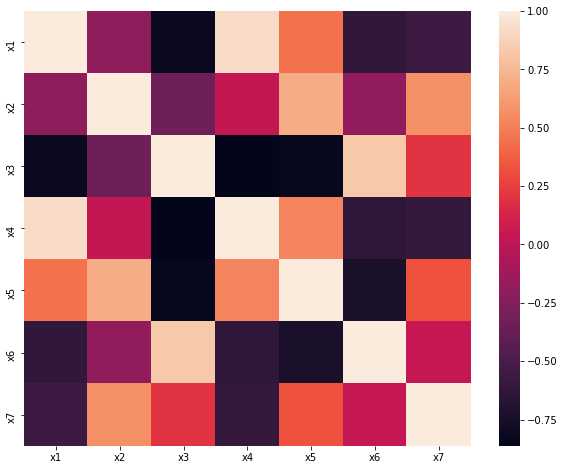

In [32]:
#visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

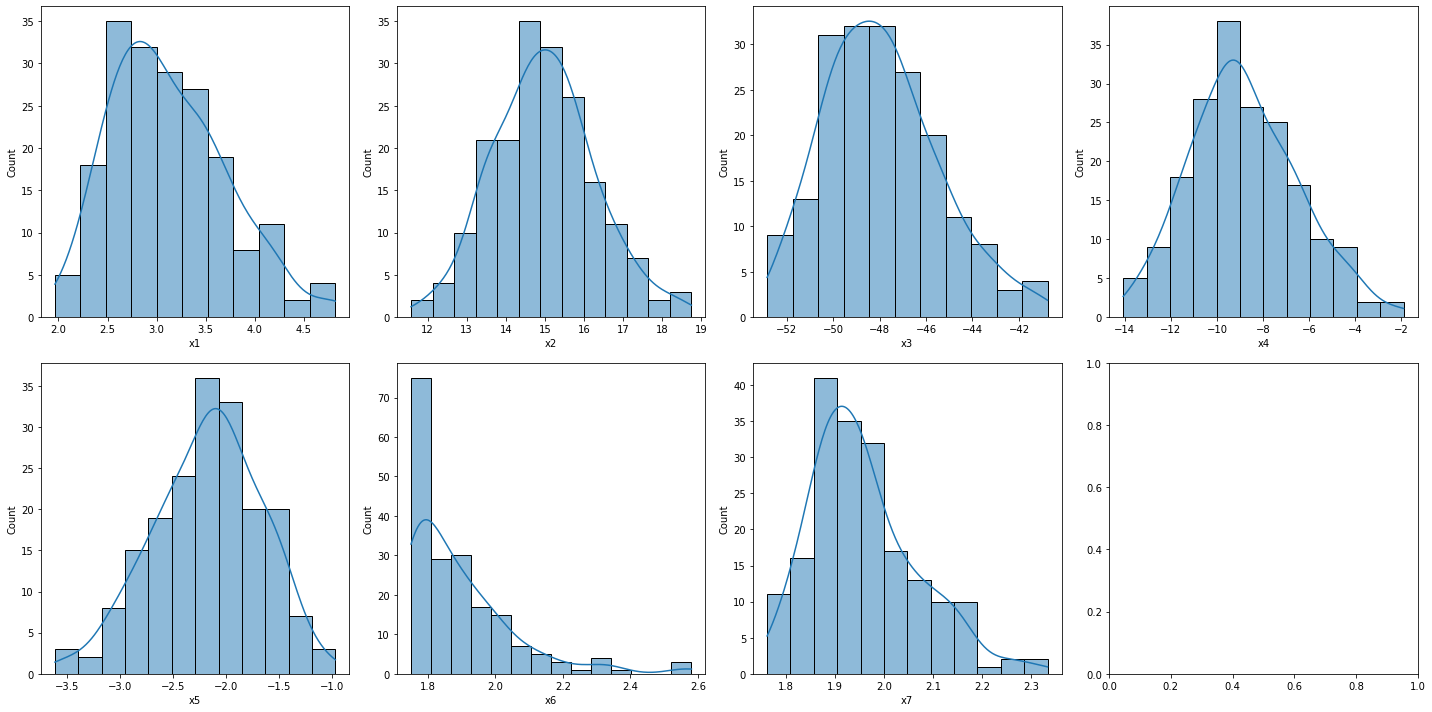

In [48]:
#checking the distributions
fig,ax=plt.subplots(2,4,figsize=(20,10))
index=0
ax=ax.flatten()
for i in df.columns:
    sns.histplot(x=df[i],ax=ax[index],kde=True)
    index+=1
    
plt.tight_layout()

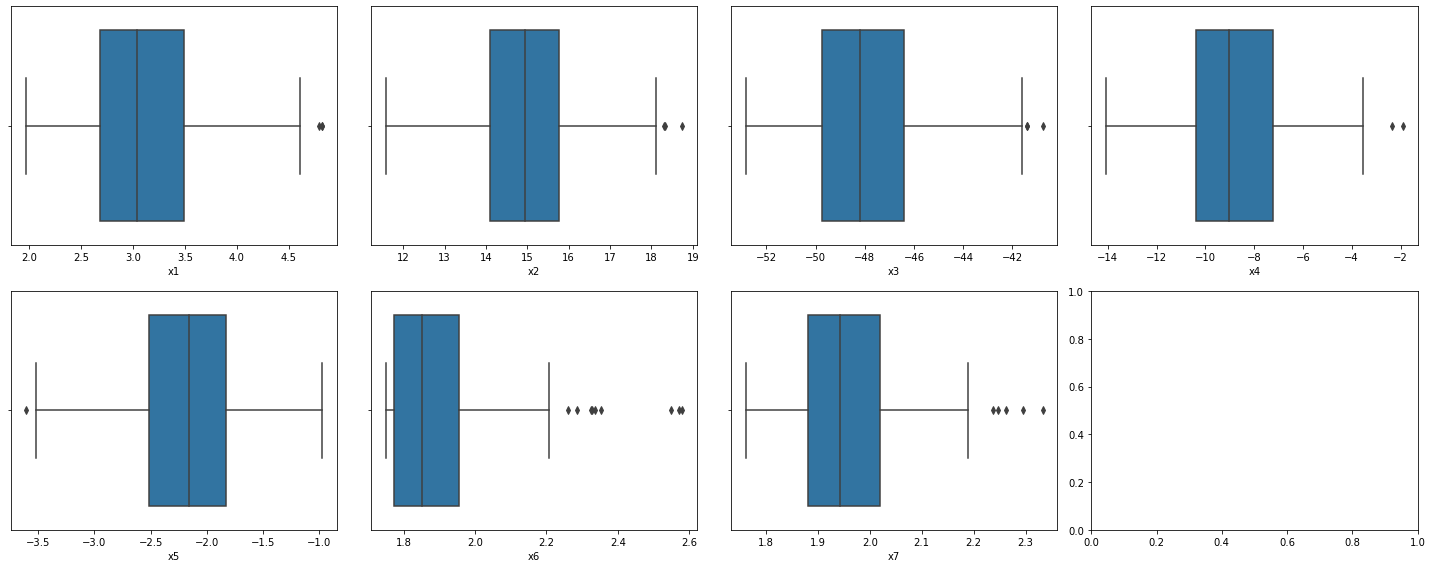

In [29]:
#visualizing the boxplot
fig,ax=plt.subplots(2,4,figsize=(20,8))
index=0
ax=ax.flatten()
for i in df.columns:
    sns.boxplot(x=df[i],ax=ax[index])
    index+=1
plt.tight_layout()    

## Data scaling

In [10]:
#scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df)


## KPCA 

**training KPCA**

In [39]:
#fitting to KPCA
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components = 10, kernel="rbf", fit_inverse_transform=True, gamma=25)
kpca.fit_transform(df_scaled)

array([[-0.00813287, -0.00885758, -0.0086702 , ..., -0.00912874,
        -0.00640791, -0.0086746 ],
       [-0.00881327, -0.00973192, -0.00979787, ..., -0.01218032,
        -0.04041134,  0.12136586],
       [-0.00813867, -0.0088646 , -0.0086782 , ..., -0.00915165,
        -0.00642824, -0.00870338],
       ...,
       [-0.00941195, -0.01043329, -0.01052518, ..., -0.01747612,
        -0.01608835, -0.02335693],
       [-0.0083672 , -0.00914213, -0.00899727, ..., -0.01008452,
        -0.00729793, -0.00994455],
       [-0.0083943 , -0.00917539, -0.0090413 , ..., -0.00975761,
        -0.00718094, -0.00979776]])

**Plotting the explained variance**

In [40]:
#finding the explained variance
#KPCA has no attribute called explained_variance_ratio therefore we need to find that on our own
#let's
explained_variance_=np.var(kpca.fit_transform(df_scaled),axis=0)
explained_variance_ratio_=(explained_variance_)/(np.sum(explained_variance_))
explained_variance_ratio_


array([0.12320674, 0.11859329, 0.11265882, 0.10218485, 0.09422941,
       0.09281123, 0.09183072, 0.09014054, 0.0873989 , 0.08694549])

Text(0.5, 1.0, 'cumulative explained variance')

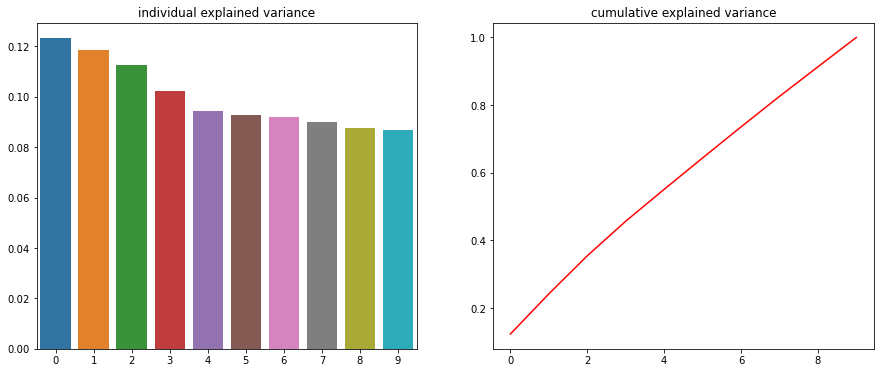

In [41]:
#since we found the attribute lets plot it with the number of components
fig,ax=plt.subplots(1,2,figsize=(15,6))

#explained variance vs number of components plot
x=np.arange(explained_variance_ratio_.size)
y=explained_variance_ratio_
sns.barplot(x,y,ax=ax[0]).set_title("individual explained variance")

#cumulative explained variance vs number of components plot
x=np.arange(explained_variance_ratio_.size)
y=np.cumsum(explained_variance_ratio_)
sns.lineplot(x,y,color="red",ax=ax[1]).set_title("cumulative explained variance")
